In this notebook, we will cover:

* [Facets](#Facets)
* [Geometric Objects](#Geometric-Objects)

Let us start by revisiting the **mpg** data set that we saw in the last lecture.

In [1]:
#options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)
print(mpg)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4         1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4         2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4         2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4         2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4         2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4         3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 quat…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 quat…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 quat…   2    2008     4 manual… 4        20    28 p     comp…
# … wit

# Facets

We already saw how to add a third variable to a scatter plot: using aesthetics. **Facets** provide another way to add a third variable.

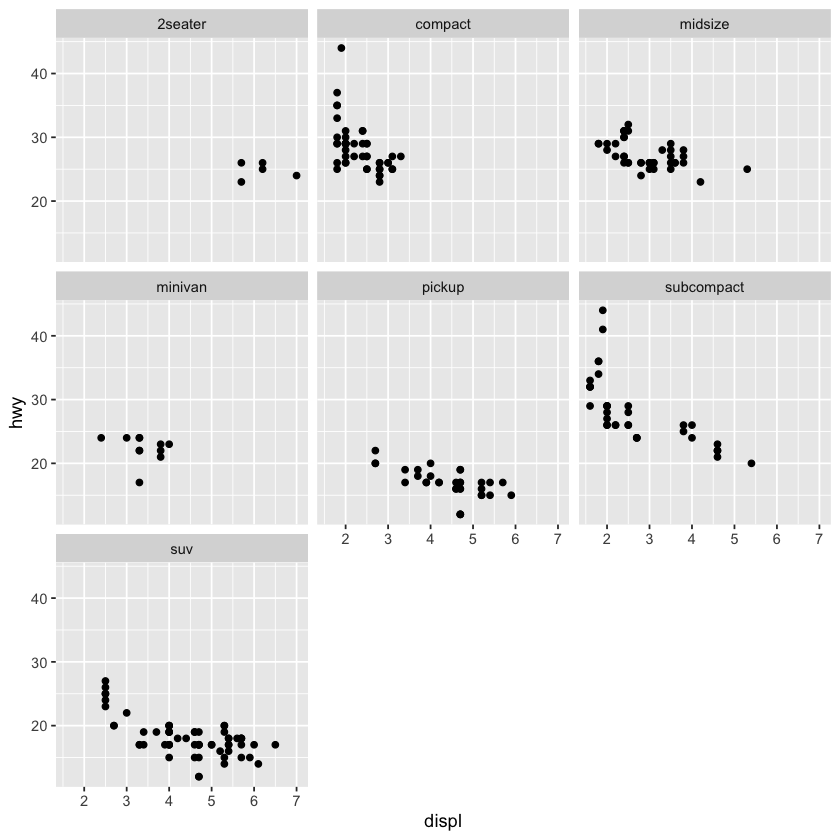

In [2]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class) # The ~ operator creates an R formula

You should facet on a discrete variable. If you facet on a continuous variable, e.g., **cty**, R will discretize it first.

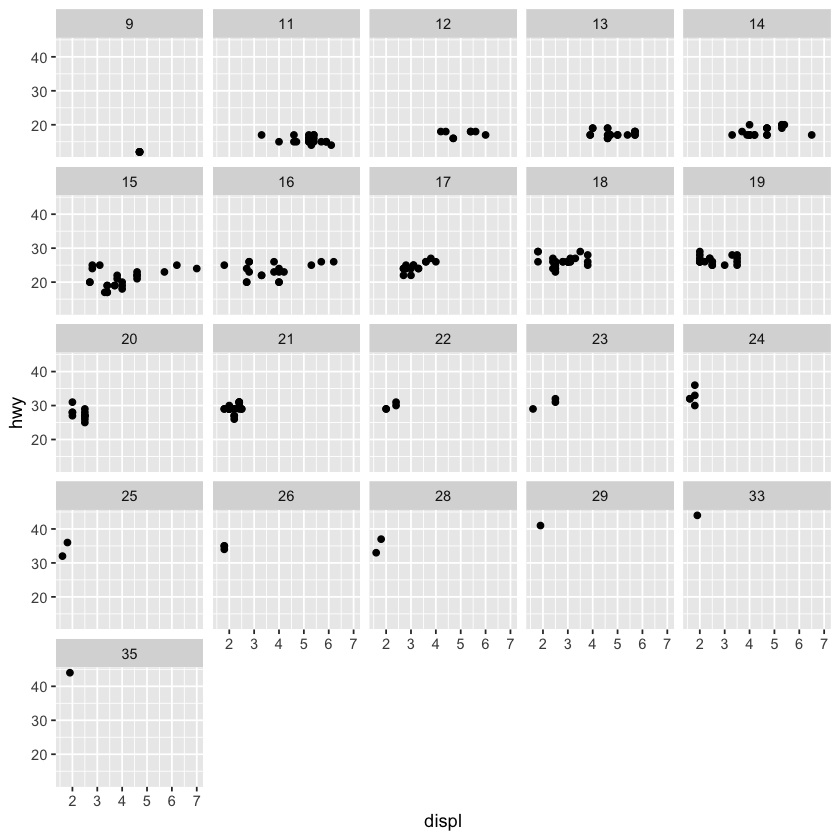

In [3]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ cty) 

You can facet on a combination of variables by modifying the formula to include more variables.

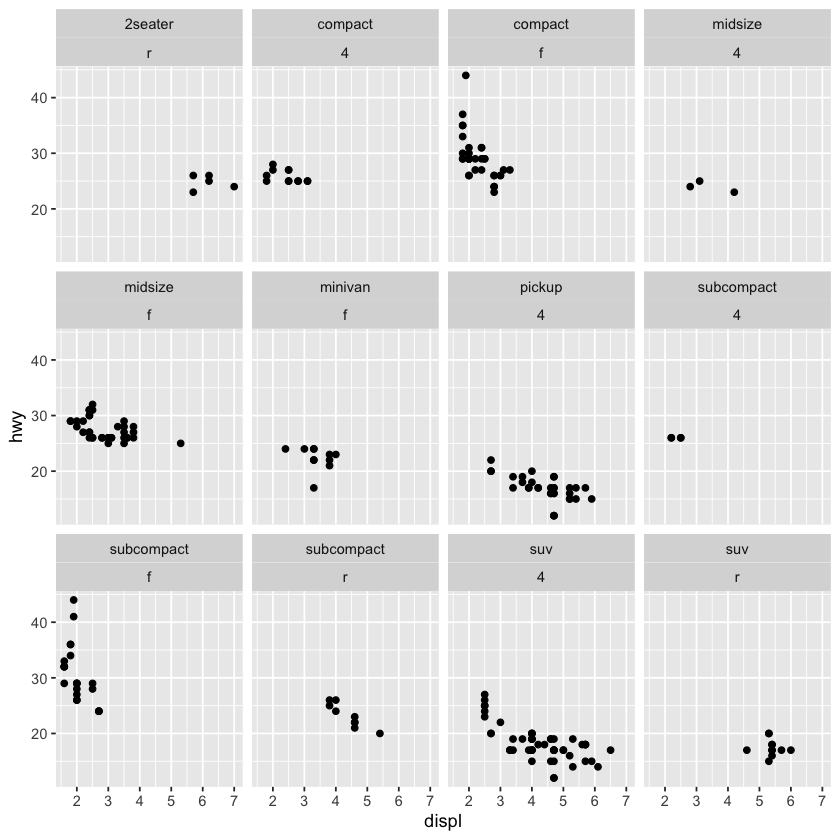

In [4]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class + drv) # The ~ operator creates an R formula

There is another way to facet on two variables: use a 2d grid

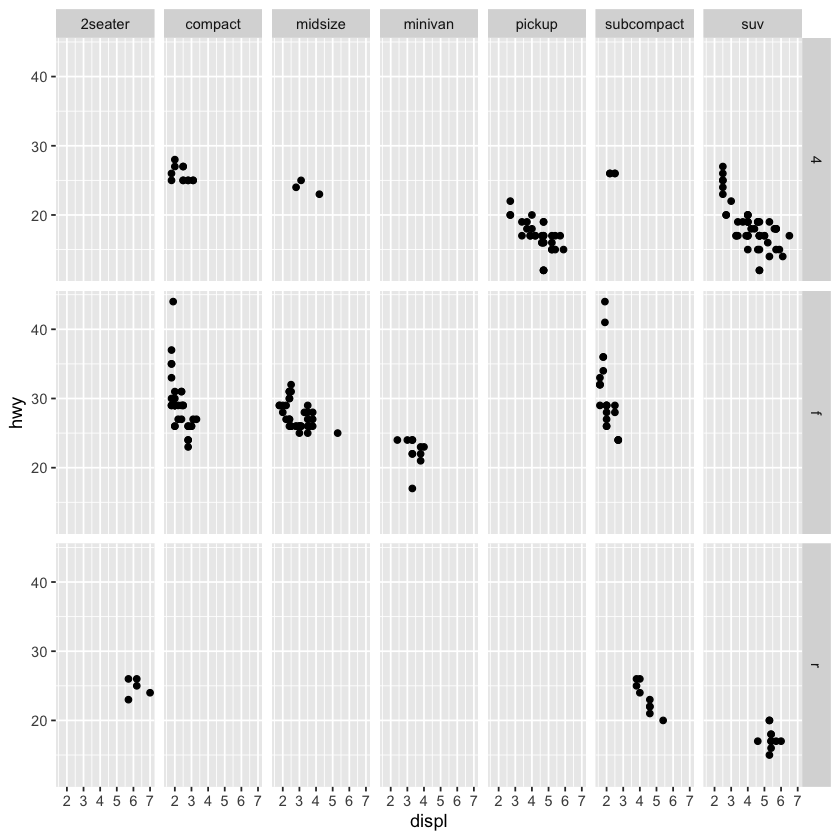

In [5]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ class) # Now we use a 2-sided formula of the form Y ~ X 

It is possible to leave out the Y axis or the X axis in `facet_grid`

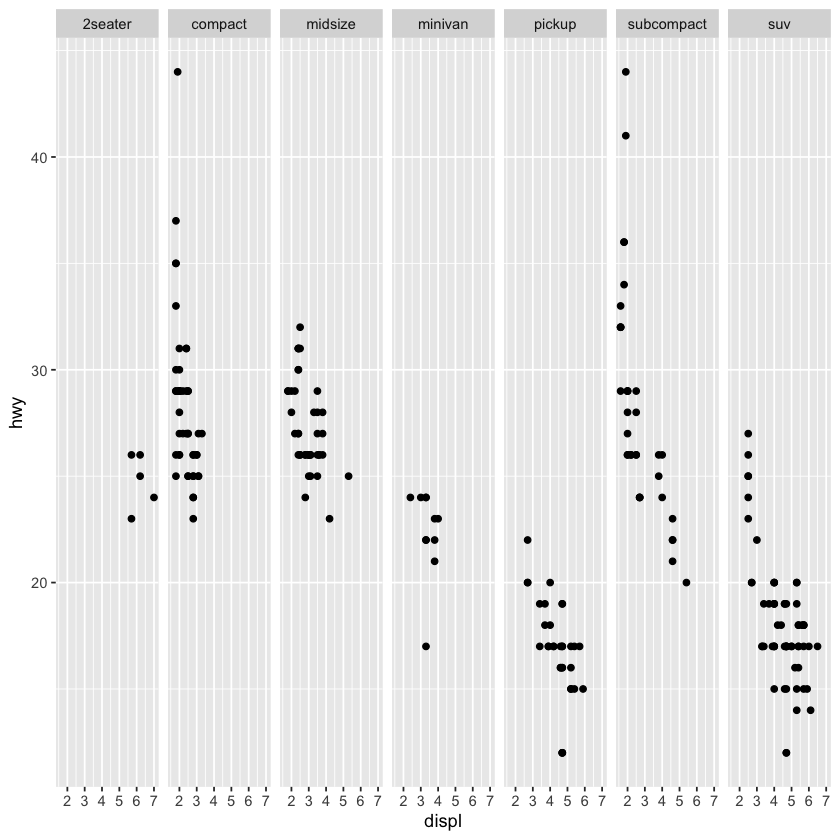

In [6]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(. ~ class) # No Y

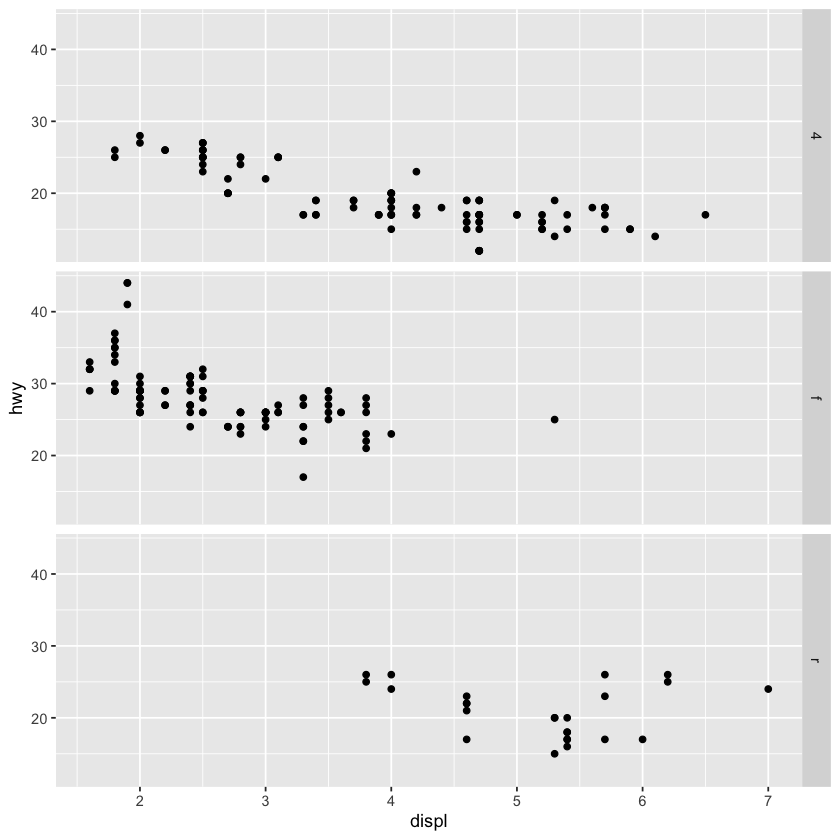

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ .) # No X

Note the difference between `facet_wrap(~ class)` and `facet_grid(. ~ class)`. The former will wrap a 1d grid over multiple rows whereas the latter will not wrap around. You can control the number of rows in `facet_wrap` using `nrow`. 

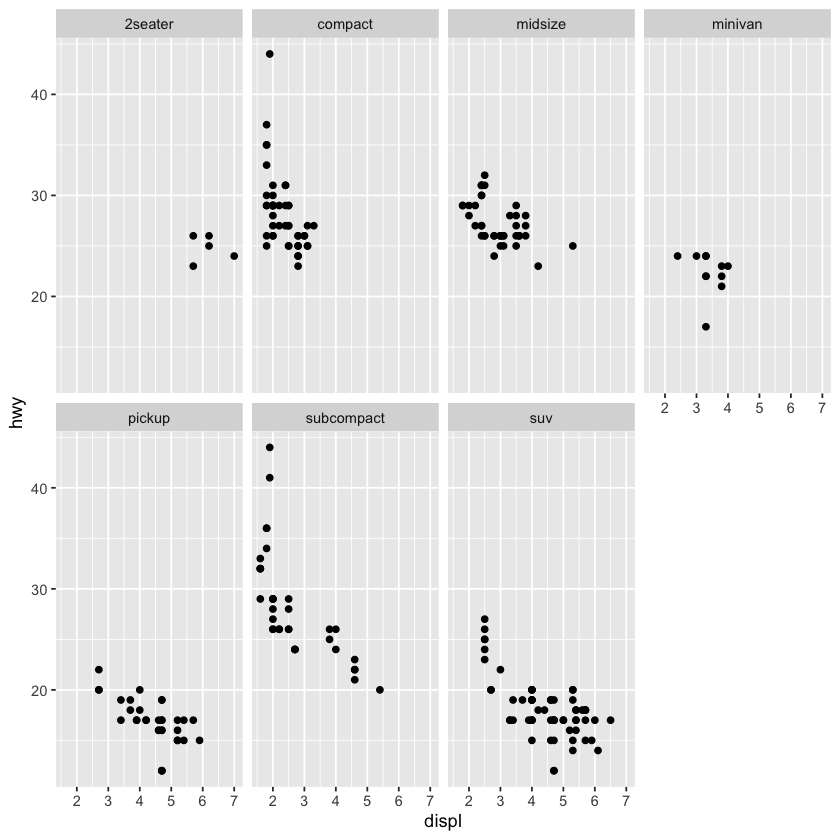

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2) # Use only 2 rows

# Geometric Objects

Let us go back to our favorite scatter plot: highway mileage vs engine displacement 😀

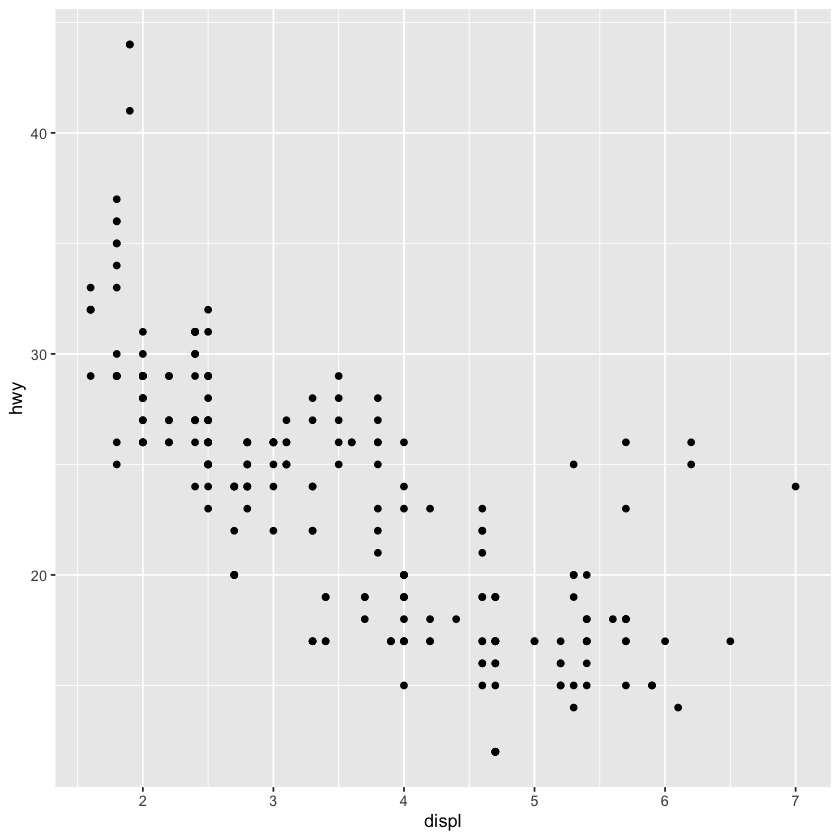

In [9]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

Instead of the point **geom** (i.e., a ggplot geometrical object) specified by `geom_point`, let us use a smooth geom using `geom_smooth`,

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



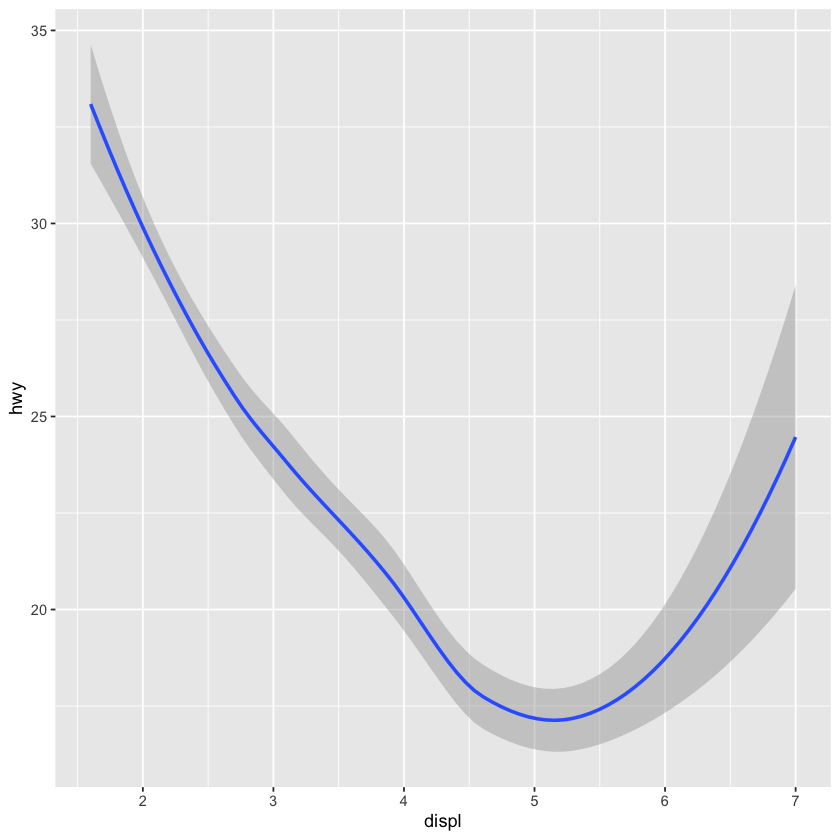

In [10]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

Note that the two plots above use exactly the same data but display them using different **geoms**.

The list of available aesthetic mappings can vary from geom to geom. E.g., `geom_point` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `shape`
* `size`
* `stroke`

`geom_smooth` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `linetype`
* `size`
* `weight`
* `ymax`
* `ymin`

Let us map the **linetype** aesthetic to the **drv** variable.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



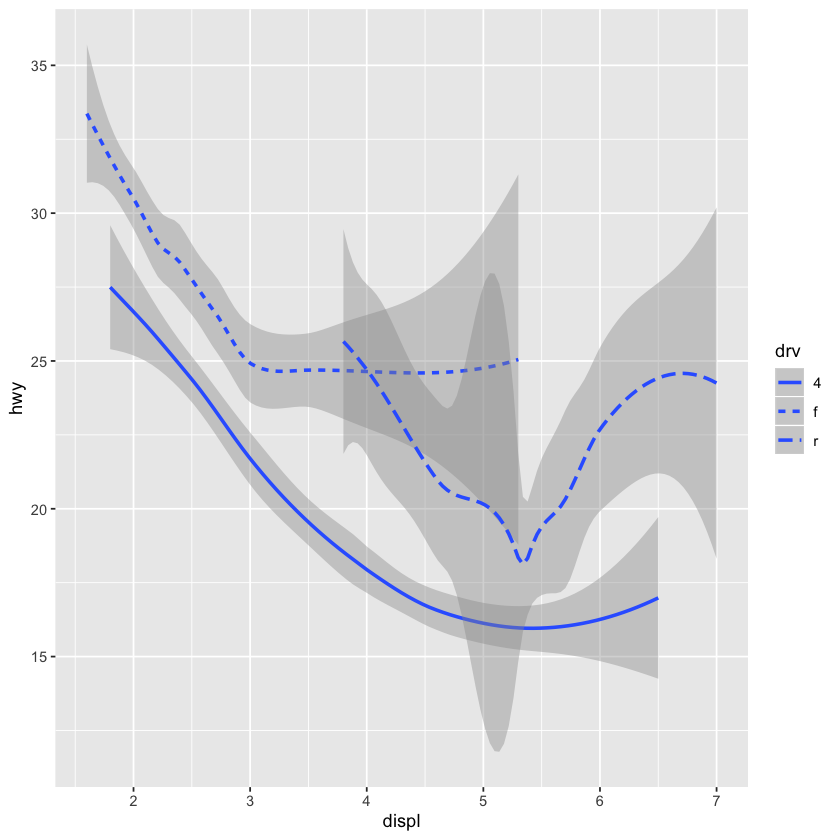

In [11]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

The aesthetic **group** needs some explanation. Note that in `geom_point`, individual rows of our data set get plotted individually as points. In contrast, in `geom_smooth` the individual rows are not plotted separately. Instead, the geometric object created by `geom_smooth` corresponds to multiple rows of data.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



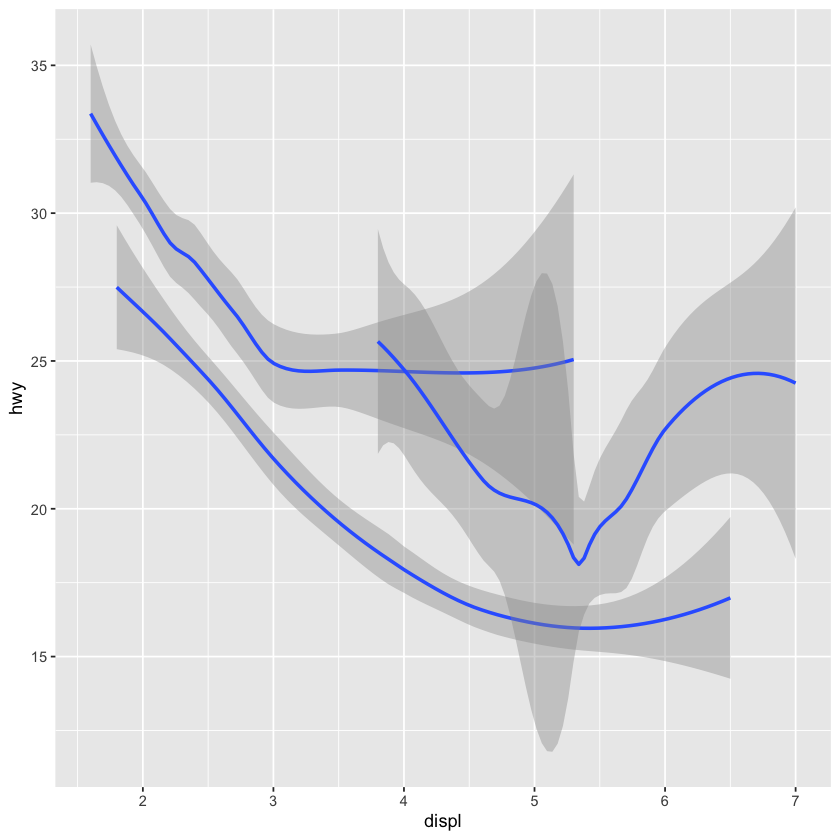

In [12]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

Contrast the above plot with the plot we get when we map the **color** aesthetic to the **drv** variable.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



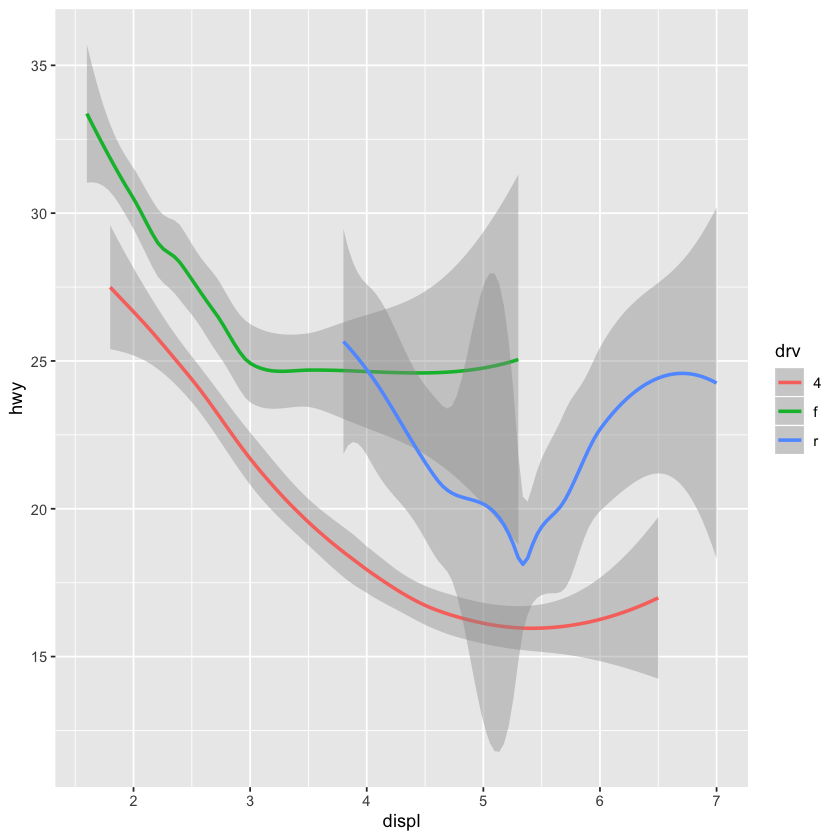

In [13]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, color = drv))

Now here's a cool thing: we can use multiple geometries in the same plot. This shows the power of the layered approach adopted by `ggplot`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



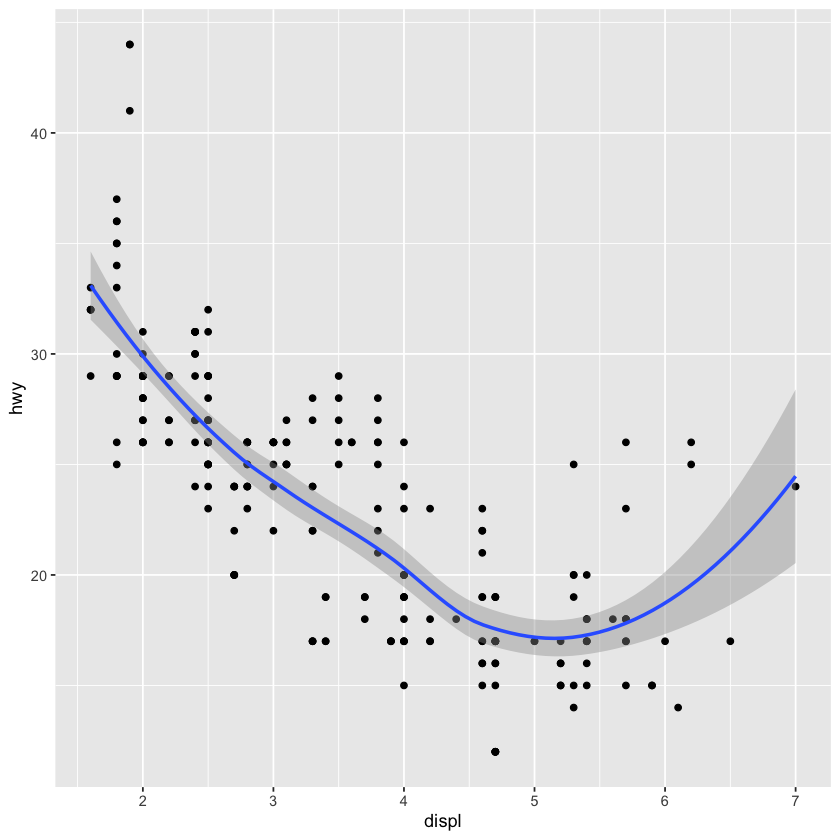

In [14]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy)) +
    geom_smooth(mapping = aes(x = displ, y = hwy))

There's a bit of code duplication above. We are specifying the `x` and `y` mappings twice. This can lead to bugs. E.g., in the code below, I changed the **y** variable to map to **cty** in the point geom but forgot to make that change for the smooth geom.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



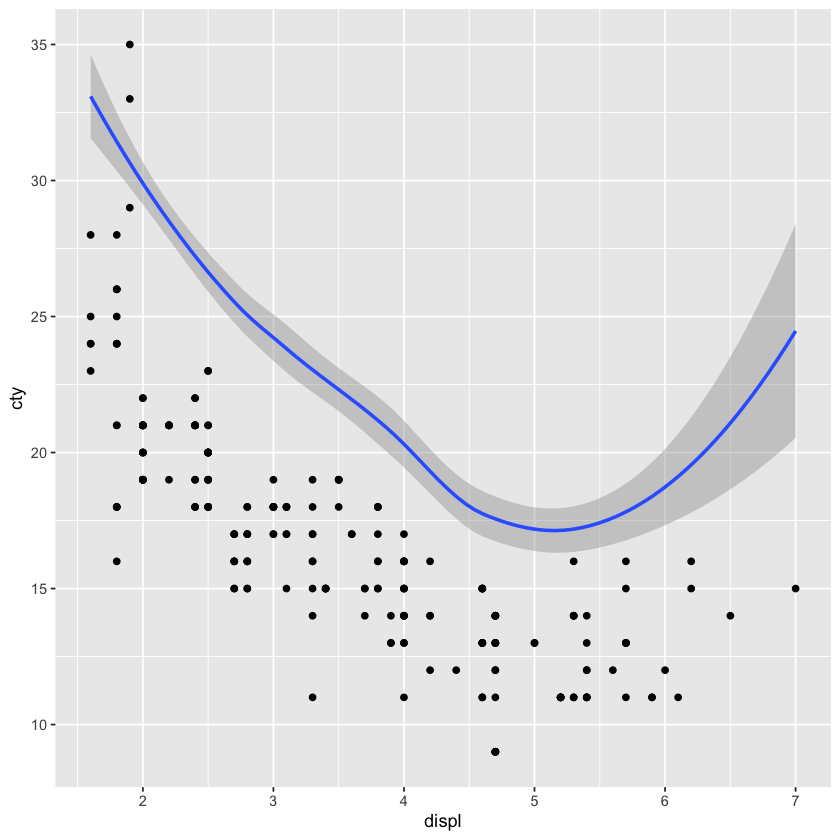

In [15]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = cty)) +
    geom_smooth(mapping = aes(x = displ, y = hwy))

A good solution to this problem is to make the x, y mappings **global**.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



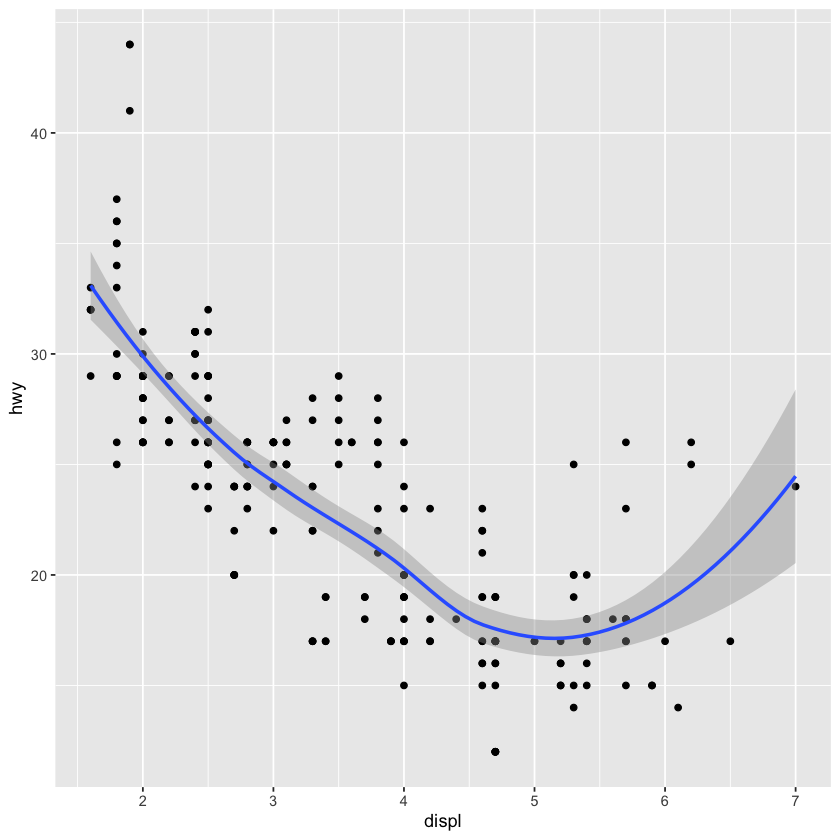

In [16]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point() +
    geom_smooth()

We can provide additional mappings in the individual geoms.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



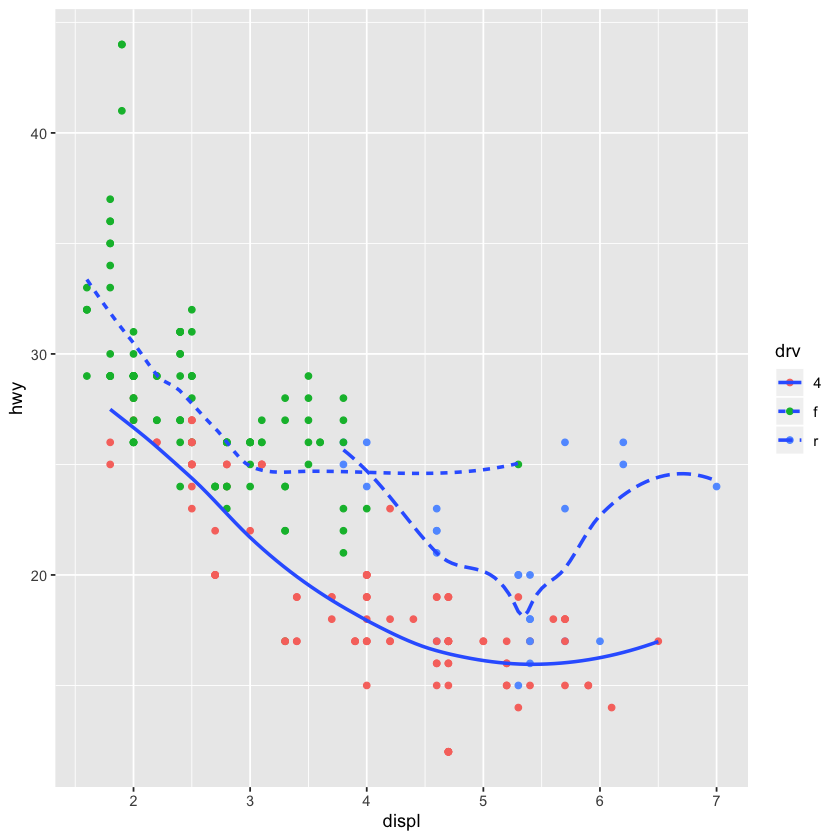

In [17]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point(mapping = aes(color = drv)) +
    geom_smooth(mapping = aes(linetype = drv), se = FALSE) # se = FALSE supresses the confidence intervals